# QUERY 1 : 📥 Financial Dataset

In [12]:
import pandas as pd

# Load Data Financial Dataset 
df = pd.read_excel("C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/Financial_Dataset.xlsx")
df.head()

# Tampilkan rows dan header 
df.head(), df.columns.tolist()

(       Project_ID  Investment_Cost  Revenue_Stream  Debt_Ratio  Payment_Delay  \
 0    PLTS-NTT-001           150.00            12.5        0.65             30   
 1  PLTM-SUMUT-001            80.00             6.8        0.55             15   
 2  PLTS-JATIM-001           200.23            18.0        0.70             45   
 3   PLTM-KALB-001            90.00             7.2        0.60             20   
 4   PLTS-SULS-001           125.50            10.0        0.50             10   
 
                                       Konteks_Proyek    Status_Rank  
 0  PLTS di Sumba, biaya logistik tinggi, pendanaa...  Medium: ★★★☆☆  
 1      PLTM di Tapanuli, akses mudah ke jaringan PLN     Low: ★★☆☆☆  
 2    PLTS besar di Surabaya, permintaan pasar tinggi    High: ★★★★☆  
 3     PLTM di Kalimantan Barat, tantangan lahan adat  Medium: ★★★☆☆  
 4      PLTS di Makassar, efisiensi tinggi distribusi     Low: ★☆☆☆☆  ,
 ['Project_ID',
  'Investment_Cost',
  'Revenue_Stream',
  'Debt_Ratio',
  'Pay

       Project_ID       GNPV
1  PLTM-SUMUT-001 -16.990643
3   PLTM-KALB-001 -23.284210
7   PLTM-ACHD-001 -24.770468
9   PLTM-SULU-001 -25.504386
5   PLTM-PAPU-001 -25.871345
4   PLTS-SULS-001 -32.839181
2  PLTS-JATIM-001 -33.440526
0    PLTS-NTT-001 -34.173976
8   PLTS-JABW-001 -34.678362
6    PLTS-NTB-001 -41.008771


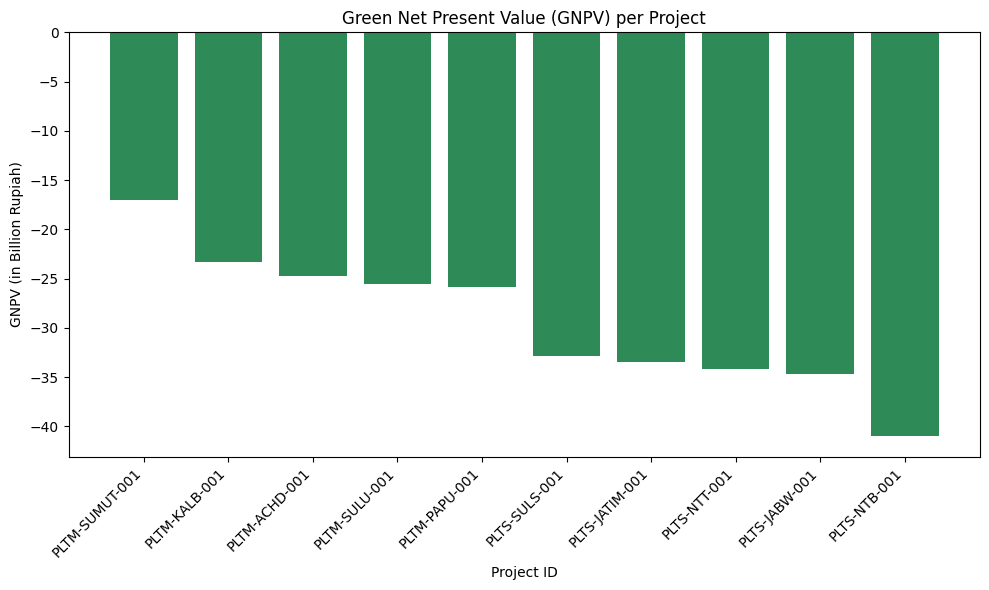

In [24]:
import matplotlib.pyplot as plt

df['GNPV'] = df.apply(calculate_gnpv, axis=1)

# Drop baris yang error
df = df.dropna(subset=['GNPV'])

# Urutkan
df_sorted = df.sort_values('GNPV', ascending=False)

# Cek apakah data ada
print(df_sorted[['Project_ID', 'GNPV']])

# Buat plot
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Project_ID'], df_sorted['GNPV'], color='seagreen')
plt.title('Green Net Present Value (GNPV) per Project')
plt.xlabel('Project ID')
plt.ylabel('GNPV (in Billion Rupiah)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

## Script Lengkap

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel
df = pd.read_excel("C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/Financial_Dataset.xlsx")
df.head()

# Hitung GNPV
discount_rate = 0.05
years = 10
externality_factor = 0.2

def calculate_gnpv(row):
    try:
        CF_t = float(row['Revenue_Stream'])
        E_t = externality_factor * CF_t
        I_0 = float(row['Investment_Cost'])
        return sum([(CF_t + E_t) / ((1 + discount_rate) ** t) for t in range(1, years + 1)]) - I_0
    except:
        return None  # skip error row

df['GNPV'] = df.apply(calculate_gnpv, axis=1)

# Drop baris yang error
df = df.dropna(subset=['GNPV'])

# Urutkan
df_sorted = df.sort_values('GNPV', ascending=False)

# Cek apakah data ada
print(df_sorted[['Project_ID', 'GNPV']])

# Buat plot
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Project_ID'], df_sorted['GNPV'], color='seagreen')
plt.title('Green Net Present Value (GNPV) per Project')
plt.xlabel('Project ID')
plt.ylabel('GNPV (in Billion Rupiah)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Simpan grafik
chart_path = "C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/gnpv_bar_chart.png"
plt.savefig(chart_path)
plt.close()

print("✅ Grafik berhasil disimpan di:", chart_path)


       Project_ID       GNPV
1  PLTM-SUMUT-001 -16.990643
3   PLTM-KALB-001 -23.284210
7   PLTM-ACHD-001 -24.770468
9   PLTM-SULU-001 -25.504386
5   PLTM-PAPU-001 -25.871345
4   PLTS-SULS-001 -32.839181
2  PLTS-JATIM-001 -33.440526
0    PLTS-NTT-001 -34.173976
8   PLTS-JABW-001 -34.678362
6    PLTS-NTB-001 -41.008771
✅ Grafik berhasil disimpan di: C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/gnpv_bar_chart.png


# QUERY 2 : 📥 Environmental Dataset

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

env_path = "C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/Environmental_Dataset.xlsx"
fin_path = "C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/Financial_Dataset.xlsx"

df_env = pd.read_excel(env_path)
df_fin = pd.read_excel(fin_path)

df_merged = pd.merge(df_env, df_fin[['Project_ID', 'Investment_Cost']], on='Project_ID', how='left')

carbon_price = 500_000
years = 10

df_merged['Carbon_Value'] = df_merged['CO2_Reduction'] * carbon_price * years
df_merged['Investment_Cost_Rp'] = df_merged['Investment_Cost'] * 1_000_000_000
df_merged['CROI'] = df_merged['Carbon_Value'] / df_merged['Investment_Cost_Rp']

print("\n📊 Data untuk Chart CROI:")
print(df_merged[['Project_ID', 'CO2_Reduction', 'Investment_Cost', 'Carbon_Value', 'CROI']])


📊 Data untuk Chart CROI:
       Project_ID  CO2_Reduction  Investment_Cost  Carbon_Value      CROI
0    PLTS-NTT-001          75000           150.00  375000000000  2.500000
1  PLTM-SUMUT-001          30000            80.00  150000000000  1.875000
2  PLTS-JATIM-001          90000           200.23  450000000000  2.247415
3   PLTM-KALB-001          35000            90.00  175000000000  1.944444
4   PLTS-SULS-001          60000           125.50  300000000000  2.390438
5   PLTM-PAPU-001          40000           100.00  200000000000  2.000000
6    PLTS-NTB-001          80000           180.00  400000000000  2.222222
7   PLTM-ACHD-001          32000            85.00  160000000000  1.882353
8   PLTS-JABW-001          95000           220.00  475000000000  2.159091
9   PLTM-SULU-001          36000            95.00  180000000000  1.894737


In [35]:
# --- STEP 5: Lanjutkan jika data valid ---
df_valid = df_merged.dropna(subset=['CROI']).sort_values('CROI', ascending=False)

# Tampilkan juga ke terminal (jika jumlah sedikit)
print("\n📌 Data yang akan dipakai untuk grafik:")
print(df_valid[['Project_ID', 'CROI']])


📌 Data yang akan dipakai untuk grafik:
       Project_ID      CROI
0    PLTS-NTT-001  2.500000
4   PLTS-SULS-001  2.390438
2  PLTS-JATIM-001  2.247415
6    PLTS-NTB-001  2.222222
8   PLTS-JABW-001  2.159091
5   PLTM-PAPU-001  2.000000
3   PLTM-KALB-001  1.944444
9   PLTM-SULU-001  1.894737
7   PLTM-ACHD-001  1.882353
1  PLTM-SUMUT-001  1.875000


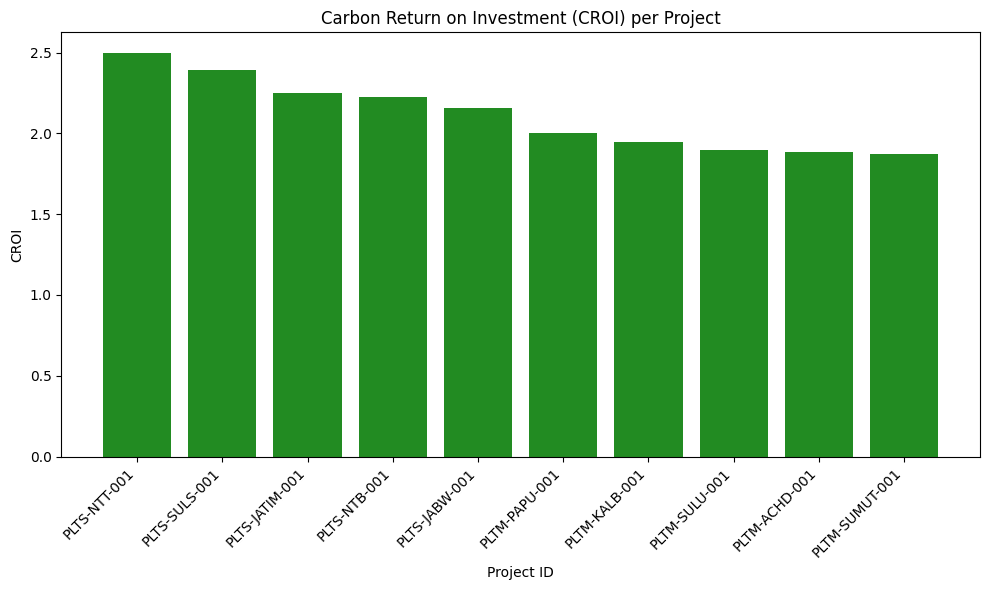

In [38]:
plt.figure(figsize=(10, 6))
plt.bar(df_valid['Project_ID'], df_valid['CROI'], color='forestgreen')
plt.title('Carbon Return on Investment (CROI) per Project')
plt.xlabel('Project ID')
plt.ylabel('CROI')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

## Script Lengkap

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

env_path = "C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/Environmental_Dataset.xlsx"
fin_path = "C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/Financial_Dataset.xlsx"

df_env = pd.read_excel(env_path)
df_fin = pd.read_excel(fin_path)

df_merged = pd.merge(df_env, df_fin[['Project_ID', 'Investment_Cost']], on='Project_ID', how='left')

carbon_price = 500_000
years = 10

df_merged['Carbon_Value'] = df_merged['CO2_Reduction'] * carbon_price * years
df_merged['Investment_Cost_Rp'] = df_merged['Investment_Cost'] * 1_000_000_000
df_merged['CROI'] = df_merged['Carbon_Value'] / df_merged['Investment_Cost_Rp']

print("\n📊 Data untuk Chart CROI:")
print(df_merged[['Project_ID', 'CO2_Reduction', 'Investment_Cost', 'Carbon_Value', 'CROI']])

df_valid = df_merged.dropna(subset=['CROI']).sort_values('CROI', ascending=False)

print("\n📌 Data yang akan dipakai untuk grafik:")
print(df_valid[['Project_ID', 'CROI']])

if not df_valid.empty:
    plt.figure(figsize=(10, 6))
    plt.bar(df_valid['Project_ID'], df_valid['CROI'], color='forestgreen')
    plt.title('Carbon Return on Investment (CROI) per Project')
    plt.xlabel('Project ID')
    plt.ylabel('CROI')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    chart_path = "C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/croi_bar_chart.png"
    plt.savefig(chart_path)
    plt.close()
    print(f"\n✅ Grafik CROI berhasil disimpan di: {chart_path}")
else:
    print("\n⚠️ Data kosong! Grafik tidak dibuat.")



📊 Data untuk Chart CROI:
       Project_ID  CO2_Reduction  Investment_Cost  Carbon_Value      CROI
0    PLTS-NTT-001          75000           150.00  375000000000  2.500000
1  PLTM-SUMUT-001          30000            80.00  150000000000  1.875000
2  PLTS-JATIM-001          90000           200.23  450000000000  2.247415
3   PLTM-KALB-001          35000            90.00  175000000000  1.944444
4   PLTS-SULS-001          60000           125.50  300000000000  2.390438
5   PLTM-PAPU-001          40000           100.00  200000000000  2.000000
6    PLTS-NTB-001          80000           180.00  400000000000  2.222222
7   PLTM-ACHD-001          32000            85.00  160000000000  1.882353
8   PLTS-JABW-001          95000           220.00  475000000000  2.159091
9   PLTM-SULU-001          36000            95.00  180000000000  1.894737

📌 Data yang akan dipakai untuk grafik:
       Project_ID      CROI
0    PLTS-NTT-001  2.500000
4   PLTS-SULS-001  2.390438
2  PLTS-JATIM-001  2.247415
6    PLT

# QUERY 3 : 📥 Social Dataset

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# --- STEP 1: Load Dataset ---
soc_path = "C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/Social_Dataset.xlsx"
fin_path = "C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/Financial_Dataset.xlsx"

df_soc = pd.read_excel(soc_path)
df_fin = pd.read_excel(fin_path)
print("Kolom tersedia:", df_merged.columns.tolist())
print("Kolom yang tersedia:", df_soc.columns.tolist())



Kolom tersedia: ['Project_ID', 'Land_Status', 'Community_Support', 'Population_Density', 'Konteks_Sosial', 'Tingkat_Konflik', 'Investment_Cost']
Kolom yang tersedia: ['Project_ID', 'Land_Status', 'Community_Support', 'Population_Density', 'Konteks_Sosial', 'Tingkat_Konflik']


In [51]:
print("\n🧪 Cek nilai Investment Cost:")
print(df[['project_id', 'investment_cost']])



🧪 Cek nilai Investment Cost:
       project_id  investment_cost
0    PLTS-NTT-001           150.00
1  PLTM-SUMUT-001            80.00
2  PLTS-JATIM-001           200.23
3   PLTM-KALB-001            90.00
4   PLTS-SULS-001           125.50
5   PLTM-PAPU-001           100.00
6    PLTS-NTB-001           180.00
7   PLTM-ACHD-001            85.00
8   PLTS-JABW-001           220.00
9   PLTM-SULU-001            95.00


In [52]:
print("Sample dari Social Dataset:", df_soc['project_id'].head())
print("Sample dari Financial Dataset:", df_fin['project_id'].head())


Sample dari Social Dataset: 0      PLTS-NTT-001
1    PLTM-SUMUT-001
2    PLTS-JATIM-001
3     PLTM-KALB-001
4     PLTS-SULS-001
Name: project_id, dtype: object
Sample dari Financial Dataset: 0      PLTS-NTT-001
1    PLTM-SUMUT-001
2    PLTS-JATIM-001
3     PLTM-KALB-001
4     PLTS-SULS-001
Name: project_id, dtype: object


In [53]:
print("\n🧩 Hasil merge Social + Financial:")
print(df.head())



🧩 Hasil merge Social + Financial:
       project_id land_status  community_support  population_density  \
0    PLTS-NTT-001        Adat                 70                  50   
1  PLTM-SUMUT-001      Negara                 85                 200   
2  PLTS-JATIM-001      Swasta                 90                 800   
3   PLTM-KALB-001        Adat                 65                 100   
4   PLTS-SULS-001      Negara                 80                 300   

                               konteks_sosial  tingkat_konflik  \
0      Sumba: lahan adat, konsultasi intensif              NaN   
1  Tapanuli: izin BPN lancar, dukungan tinggi              NaN   
2    Surabaya: lahan swasta, masyarakat urban              NaN   
3   Kalbar: lahan adat, risiko konflik sedang              NaN   
4         Makassar: izin mudah, dukungan baik              NaN   

   investment_cost  denominator  social_value  investment_cost_rp  sroi  
0           150.00          NaN           NaN        1.500000

In [54]:
df = pd.merge(df_soc, df_fin[['project_id', 'investment_cost']], on='project_id', how='left')


In [59]:
import pandas as pd
import matplotlib.pyplot as plt

soc_path = "C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/Social_Dataset.xlsx"
fin_path = "C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/Financial_Dataset.xlsx"

df_soc = pd.read_excel(soc_path)
df_fin = pd.read_excel(fin_path)

df_soc.columns = df_soc.columns.str.strip().str.replace(" ", "_").str.lower()
df_fin.columns = df_fin.columns.str.strip().str.replace(" ", "_").str.lower()

df_soc['project_id'] = df_soc['project_id'].astype(str).str.strip().str.upper()
df_fin['project_id'] = df_fin['project_id'].astype(str).str.strip().str.upper()

df = pd.merge(df_soc, df_fin[['project_id', 'investment_cost']], on='project_id', how='left')

for col in ['community_support', 'population_density', 'investment_cost']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

def extract_konflik_score(text):
    text = str(text).lower()
    if 'dukungan tinggi' in text or 'izin mudah' in text:
        return 0.2
    elif 'konflik sedang' in text or 'konsultasi intensif' in text:
        return 0.5
    elif 'masyarakat menolak' in text or 'tidak pasti' in text:
        return 0.8
    else:
        return 0.4  

df['tingkat_konflik'] = df['konteks_sosial'].apply(extract_konflik_score)

df['denominator'] = 1 + df['tingkat_konflik']
df['social_value'] = (df['community_support'] * df['population_density']) / df['denominator']
df['investment_cost_rp'] = df['investment_cost'] * 1_000_000_000
df['sroi'] = df['social_value'] / df['investment_cost_rp']

print("\n📊 Data SROI (dengan skor konflik dari konteks_sosial):")
print(df[['project_id', 'community_support', 'population_density', 'tingkat_konflik', 'investment_cost', 'sroi']])


📊 Data SROI (dengan skor konflik dari konteks_sosial):
       project_id  community_support  population_density  tingkat_konflik  \
0    PLTS-NTT-001                 70                  50              0.5   
1  PLTM-SUMUT-001                 85                 200              0.2   
2  PLTS-JATIM-001                 90                 800              0.4   
3   PLTM-KALB-001                 65                 100              0.5   
4   PLTS-SULS-001                 80                 300              0.2   
5   PLTM-PAPU-001                 60                  20              0.4   
6    PLTS-NTB-001                 88                 400              0.4   
7   PLTM-ACHD-001                 82                 150              0.4   
8   PLTS-JABW-001                 92                1000              0.4   
9   PLTM-SULU-001                 68                 120              0.4   

   investment_cost          sroi  
0           150.00  1.555556e-08  
1            80.00  1.7708

In [60]:
df_valid = df.dropna(subset=['sroi']).sort_values('sroi', ascending=False)

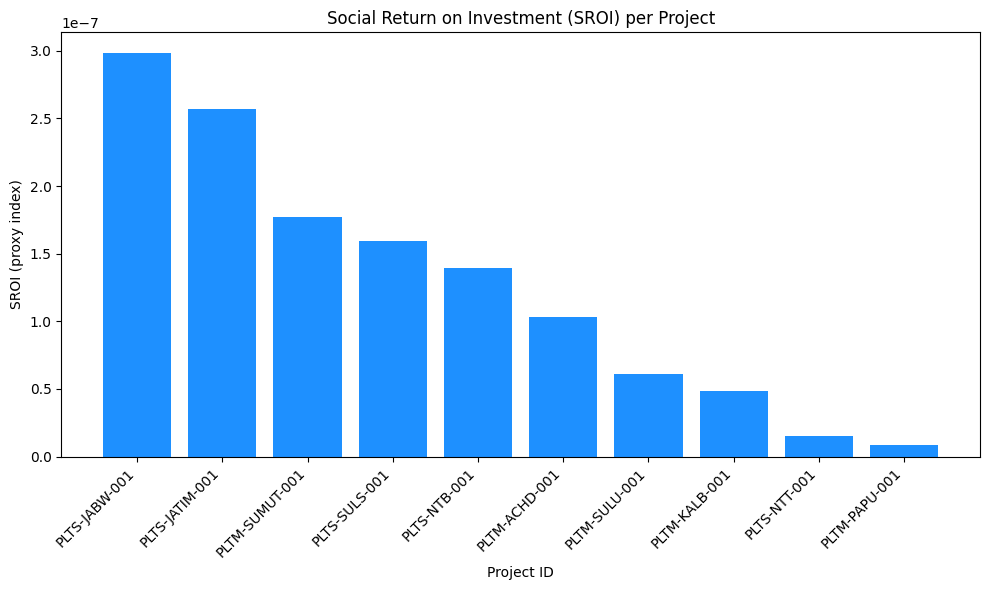

In [61]:
plt.figure(figsize=(10, 6))
plt.bar(df_valid['project_id'], df_valid['sroi'], color='dodgerblue')
plt.title('Social Return on Investment (SROI) per Project')
plt.xlabel('Project ID')
plt.ylabel('SROI (proxy index)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

## Script Lengkap 

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# --- STEP 1: Load Datasets ---
soc_path = "C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/Social_Dataset.xlsx"
fin_path = "C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/Financial_Dataset.xlsx"

df_soc = pd.read_excel(soc_path)
df_fin = pd.read_excel(fin_path)

# --- STEP 2: Bersihkan dan samakan nama kolom ---
df_soc.columns = df_soc.columns.str.strip().str.replace(" ", "_").str.lower()
df_fin.columns = df_fin.columns.str.strip().str.replace(" ", "_").str.lower()

# Normalisasi project_id
df_soc['project_id'] = df_soc['project_id'].astype(str).str.strip().str.upper()
df_fin['project_id'] = df_fin['project_id'].astype(str).str.strip().str.upper()

# --- STEP 3: Gabungkan dua dataset ---
df = pd.merge(df_soc, df_fin[['project_id', 'investment_cost']], on='project_id', how='left')

# --- STEP 4: Konversi kolom numerik ---
for col in ['community_support', 'population_density', 'investment_cost']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# --- STEP 5: Mapping konteks_sosial ke skor konflik ---
def extract_konflik_score(text):
    text = str(text).lower()
    if 'dukungan tinggi' in text or 'izin mudah' in text:
        return 0.2
    elif 'konflik sedang' in text or 'konsultasi intensif' in text:
        return 0.5
    elif 'masyarakat menolak' in text or 'tidak pasti' in text:
        return 0.8
    else:
        return 0.4  # default sedang

df['tingkat_konflik'] = df['konteks_sosial'].apply(extract_konflik_score)

# --- STEP 6: Hitung Social Value dan SROI ---
df['denominator'] = 1 + df['tingkat_konflik']
df['social_value'] = (df['community_support'] * df['population_density']) / df['denominator']
df['investment_cost_rp'] = df['investment_cost'] * 1_000_000_000
df['sroi'] = df['social_value'] / df['investment_cost_rp']

# --- STEP 7: Tampilkan data untuk validasi ---
print("\n📊 Data SROI (dengan skor konflik dari konteks_sosial):")
print(df[['project_id', 'community_support', 'population_density', 'tingkat_konflik', 'investment_cost', 'sroi']])

# --- STEP 8: Buat grafik jika data valid ---
df_valid = df.dropna(subset=['sroi']).sort_values('sroi', ascending=False)

if not df_valid.empty:
    plt.figure(figsize=(10, 6))
    plt.bar(df_valid['project_id'], df_valid['sroi'], color='dodgerblue')
    plt.title('Social Return on Investment (SROI) per Project')
    plt.xlabel('Project ID')
    plt.ylabel('SROI (proxy index)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    chart_path = "C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/sroi_bar_chart.png"
    plt.savefig(chart_path)
    plt.close()

    print(f"\n✅ Grafik SROI berhasil disimpan di: {chart_path}")
else:
    print("\n⚠️ Tidak ada data valid untuk membuat grafik SROI.")



📊 Data SROI (dengan skor konflik dari konteks_sosial):
       project_id  community_support  population_density  tingkat_konflik  \
0    PLTS-NTT-001                 70                  50              0.5   
1  PLTM-SUMUT-001                 85                 200              0.2   
2  PLTS-JATIM-001                 90                 800              0.4   
3   PLTM-KALB-001                 65                 100              0.5   
4   PLTS-SULS-001                 80                 300              0.2   
5   PLTM-PAPU-001                 60                  20              0.4   
6    PLTS-NTB-001                 88                 400              0.4   
7   PLTM-ACHD-001                 82                 150              0.4   
8   PLTS-JABW-001                 92                1000              0.4   
9   PLTM-SULU-001                 68                 120              0.4   

   investment_cost          sroi  
0           150.00  1.555556e-08  
1            80.00  1.7708

# QUERY 4 : 📥 Economic Dataset

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# --- STEP 1: Load Dataset ---
eco_path = "C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/Economic_Dataset.xlsx"
df_eco = pd.read_excel(eco_path)

print("Kolom tersedia:", df_eco.columns.tolist())


Kolom tersedia: ['Project_ID', 'GDP_Growth', 'Interest_Rate', 'Bond_Yield', 'Konteks_Ekonomi', 'Daya_Tarik_Investasi']


In [74]:
df_eco.columns = df_eco.columns.str.strip().str.lower().str.replace(" ", "_")

for col in ['gdp_growth', 'interest_rate', 'bond_yield']:
    df_eco[col] = pd.to_numeric(df_eco[col], errors='coerce')

# Tentukan baseline dan bobot 
gdp_baseline = 5.0
interest_baseline = 4.0
bond_baseline = 6.0

w1, w2, w3 = 0.3, -0.4, -0.3  # GDP naik = baik; bunga & obligasi naik = risiko

In [75]:
# Hitung Delta dan ERAF
df_eco['delta_gdp'] = (df_eco['gdp_growth'] - gdp_baseline) / gdp_baseline
df_eco['delta_interest'] = (df_eco['interest_rate'] - interest_baseline) / interest_baseline
df_eco['delta_bond'] = (df_eco['bond_yield'] - bond_baseline) / bond_baseline

df_eco['eraf'] = 1 + (
    w1 * df_eco['delta_gdp'] +
    w2 * df_eco['delta_interest'] +
    w3 * df_eco['delta_bond']
)


In [76]:
# Tampilkan data 
print("\n📊 Data ERAF:")
print(df_eco[['project_id', 'gdp_growth', 'interest_rate', 'bond_yield', 'eraf']])


📊 Data ERAF:
       project_id  gdp_growth  interest_rate  bond_yield   eraf
0    PLTS-NTT-001         4.5            4.2         5.1  0.995
1  PLTM-SUMUT-001         5.2            3.8         4.8  1.092
2  PLTS-JATIM-001         6.0            0.0         5.0  1.510
3   PLTM-KALB-001         4.8            4.1         5.2  1.018
4   PLTS-SULS-001         5.5            0.0         4.9  1.485
5   PLTM-PAPU-001         4.0            4.5         5.3  0.925
6    PLTS-NTB-001         5.8            4.0         5.0  1.098
7   PLTM-ACHD-001         4.7            3.7         4.7  1.077
8   PLTS-JABW-001         6.2            3.8         4.8  1.152
9   PLTM-SULU-001         5.0            4.3         5.1  1.015


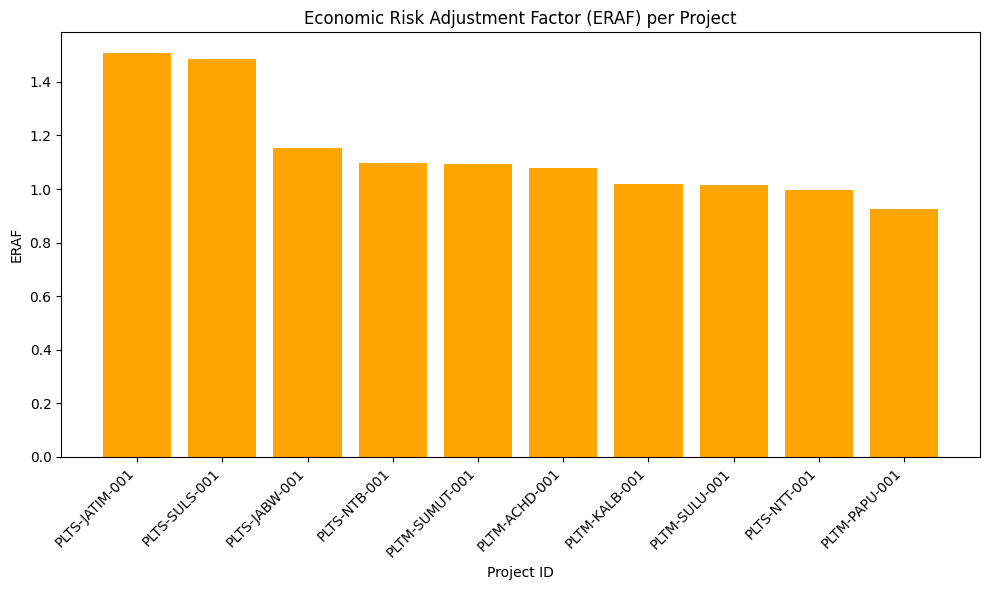

In [77]:
# Buat Grafik 
df_valid = df_eco.dropna(subset=['eraf']).sort_values('eraf', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(df_valid['project_id'], df_valid['eraf'], color='orange')
plt.title('Economic Risk Adjustment Factor (ERAF) per Project')
plt.xlabel('Project ID')
plt.ylabel('ERAF')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

## Script Lengkap 

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

eco_path = "C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/Economic_Dataset.xlsx"
df_eco = pd.read_excel(eco_path)

df_eco.columns = df_eco.columns.str.strip().str.lower().str.replace(" ", "_")

for col in ['gdp_growth', 'interest_rate', 'bond_yield']:
    df_eco[col] = pd.to_numeric(df_eco[col], errors='coerce')

gdp_baseline = 5.0
interest_baseline = 4.0
bond_baseline = 6.0

w1, w2, w3 = 0.3, -0.4, -0.3  # GDP naik = baik; bunga & obligasi naik = risiko

df_eco['delta_gdp'] = (df_eco['gdp_growth'] - gdp_baseline) / gdp_baseline
df_eco['delta_interest'] = (df_eco['interest_rate'] - interest_baseline) / interest_baseline
df_eco['delta_bond'] = (df_eco['bond_yield'] - bond_baseline) / bond_baseline

df_eco['eraf'] = 1 + (
    w1 * df_eco['delta_gdp'] +
    w2 * df_eco['delta_interest'] +
    w3 * df_eco['delta_bond']
)

print("\n📊 Data ERAF:")
print(df_eco[['project_id', 'gdp_growth', 'interest_rate', 'bond_yield', 'eraf']])

df_valid = df_eco.dropna(subset=['eraf']).sort_values('eraf', ascending=False)

if not df_valid.empty:
    plt.figure(figsize=(10, 6))
    plt.bar(df_valid['project_id'], df_valid['eraf'], color='orange')
    plt.title('Economic Risk Adjustment Factor (ERAF) per Project')
    plt.xlabel('Project ID')
    plt.ylabel('ERAF')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    chart_path = "C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/eraf_bar_chart.png"
    plt.savefig(chart_path)
    plt.close()
    print(f"\n✅ Grafik ERAF berhasil disimpan di: {chart_path}")
else:
    print("\n⚠️ Tidak ada data valid untuk membuat grafik ERAF.")



📊 Data ERAF:
       project_id  gdp_growth  interest_rate  bond_yield   eraf
0    PLTS-NTT-001         4.5            4.2         5.1  0.995
1  PLTM-SUMUT-001         5.2            3.8         4.8  1.092
2  PLTS-JATIM-001         6.0            0.0         5.0  1.510
3   PLTM-KALB-001         4.8            4.1         5.2  1.018
4   PLTS-SULS-001         5.5            0.0         4.9  1.485
5   PLTM-PAPU-001         4.0            4.5         5.3  0.925
6    PLTS-NTB-001         5.8            4.0         5.0  1.098
7   PLTM-ACHD-001         4.7            3.7         4.7  1.077
8   PLTS-JABW-001         6.2            3.8         4.8  1.152
9   PLTM-SULU-001         5.0            4.3         5.1  1.015

✅ Grafik ERAF berhasil disimpan di: C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/eraf_bar_chart.png


# QUERY 5 : 📥 Geospatial Dataset

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- STEP 1: Load Dataset ---
geo_path = "C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/Geospatial_Dataset.xlsx"
df_geo = pd.read_excel(geo_path)
print("Kolom tersedia:", df_geo.columns.tolist())


Kolom tersedia: ['Project_ID', 'Solar_Irradiance', 'Water_Flow', 'Distance_to_Grid', 'Konteks_Geospasial', 'Efisiensi_Lokasi']


In [80]:
# Bersihkan Kolom 
df_geo.columns = df_geo.columns.str.strip().str.lower().str.replace(" ", "_")

In [81]:
# Convert ke Numeric karena ada data string 
for col in ['solar_irradiance', 'distance_to_grid', 'efisiensi_lokasi']:
    df_geo[col] = pd.to_numeric(df_geo[col], errors='coerce')

In [82]:

df_geo['efisiensi_lokasi'] = df_geo['efisiensi_lokasi'].fillna(0.75)
scaler = MinMaxScaler()
df_geo[['irradiance_norm', 'distance_norm', 'efisiensi_norm']] = scaler.fit_transform(
    df_geo[['solar_irradiance', 'distance_to_grid', 'efisiensi_lokasi']]
)

# Hitung GRI 
w1, w2, w3 = 0.3, 0.4, 0.3
df_geo['gri'] = 1 - (
    w1 * df_geo['irradiance_norm'] +
    w2 * (1 - df_geo['distance_norm']) +
    w3 * df_geo['efisiensi_norm']
)


In [83]:
# tampilkan data GRI 
print("\n📊 Data GRI:")
print(df_geo[['project_id', 'solar_irradiance', 'distance_to_grid', 'efisiensi_lokasi', 'gri']])


📊 Data GRI:
       project_id  solar_irradiance  distance_to_grid  efisiensi_lokasi  \
0    PLTS-NTT-001               5.8                 8              0.75   
1  PLTM-SUMUT-001               0.0                 5              0.75   
2  PLTS-JATIM-001               5.5                 3              0.75   
3   PLTM-KALB-001               0.0                10              0.75   
4   PLTS-SULS-001               5.7                 6              0.75   
5   PLTM-PAPU-001               0.0                15              0.75   
6    PLTS-NTB-001               5.9                 4              0.75   
7   PLTM-ACHD-001               0.0                 7              0.75   
8   PLTS-JABW-001               5.4                 2              0.75   
9   PLTM-SULU-001               0.0                12              0.75   

        gri  
0  0.489700  
1  0.692308  
2  0.351108  
3  0.846154  
4  0.433246  
5  1.000000  
6  0.361538  
7  0.753846  
8  0.325424  
9  0.907692  


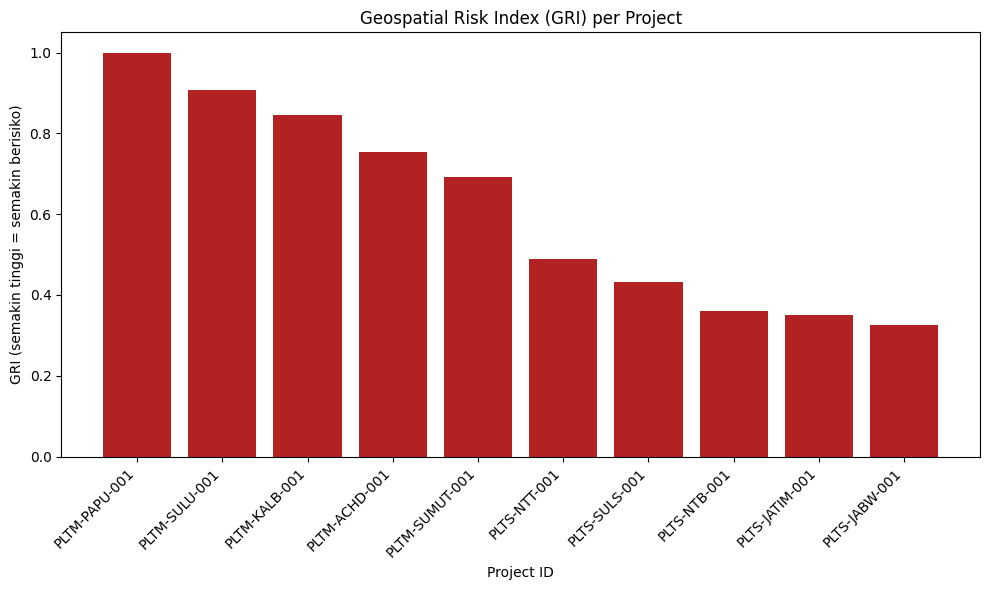

In [84]:
# Buat Grafik 
df_valid = df_geo.dropna(subset=['gri']).sort_values('gri', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(df_valid['project_id'], df_valid['gri'], color='firebrick')
plt.title('Geospatial Risk Index (GRI) per Project')
plt.xlabel('Project ID')
plt.ylabel('GRI (semakin tinggi = semakin berisiko)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

## Script Lengkap 

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

geo_path = "C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/Geospatial_Dataset.xlsx"
df_geo = pd.read_excel(geo_path)

df_geo.columns = df_geo.columns.str.strip().str.lower().str.replace(" ", "_")

for col in ['solar_irradiance', 'distance_to_grid', 'efisiensi_lokasi']:
    df_geo[col] = pd.to_numeric(df_geo[col], errors='coerce')

df_geo['efisiensi_lokasi'] = df_geo['efisiensi_lokasi'].fillna(0.75)

scaler = MinMaxScaler()
df_geo[['irradiance_norm', 'distance_norm', 'efisiensi_norm']] = scaler.fit_transform(
    df_geo[['solar_irradiance', 'distance_to_grid', 'efisiensi_lokasi']]
)

w1, w2, w3 = 0.3, 0.4, 0.3
df_geo['gri'] = 1 - (
    w1 * df_geo['irradiance_norm'] +
    w2 * (1 - df_geo['distance_norm']) +
    w3 * df_geo['efisiensi_norm']
)

print("\n📊 Data GRI:")
print(df_geo[['project_id', 'solar_irradiance', 'distance_to_grid', 'efisiensi_lokasi', 'gri']])

df_valid = df_geo.dropna(subset=['gri']).sort_values('gri', ascending=False)

if not df_valid.empty:
    plt.figure(figsize=(10, 6))
    plt.bar(df_valid['project_id'], df_valid['gri'], color='firebrick')
    plt.title('Geospatial Risk Index (GRI) per Project')
    plt.xlabel('Project ID')
    plt.ylabel('GRI (semakin tinggi = semakin berisiko)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    chart_path = "C:/Users/046ITAVT/Documents/046ITAVT/Training/A9046DB2025/202506/Tugas/gri_bar_chart.png"
    plt.savefig(chart_path)
    plt.close()
    print(f"\n✅ Grafik GRI berhasil disimpan di: {chart_path}")
else:
    print("\n⚠️ Tidak ada data valid untuk membuat grafik GRI.")



📊 Data GRI:
       project_id  solar_irradiance  distance_to_grid  efisiensi_lokasi  \
0    PLTS-NTT-001               5.8                 8              0.75   
1  PLTM-SUMUT-001               0.0                 5              0.75   
2  PLTS-JATIM-001               5.5                 3              0.75   
3   PLTM-KALB-001               0.0                10              0.75   
4   PLTS-SULS-001               5.7                 6              0.75   
5   PLTM-PAPU-001               0.0                15              0.75   
6    PLTS-NTB-001               5.9                 4              0.75   
7   PLTM-ACHD-001               0.0                 7              0.75   
8   PLTS-JABW-001               5.4                 2              0.75   
9   PLTM-SULU-001               0.0                12              0.75   

        gri  
0  0.489700  
1  0.692308  
2  0.351108  
3  0.846154  
4  0.433246  
5  1.000000  
6  0.361538  
7  0.753846  
8  0.325424  
9  0.907692  

✅ Graf